In [27]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [14]:
from neuralprophet import NeuralProphet

In [15]:
data=pd.read_csv('wiki_machine_learning.csv', sep=' ')
df=data.copy()
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [16]:
df[df['count']==0]

,date,count,lang,page,rank,month,title
104,2015-02-05,0,en,Machine_learning,8708,201502,Machine_learning


In [17]:
df.drop(104, inplace=True)

In [20]:
df=df.reset_index().drop(['index'],axis=1)
df=df.loc[:,['date','count']]
df

,date,count
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


In [21]:
df.isnull().sum()

date     0
count    0
dtype: int64

In [22]:
df.date=pd.to_datetime(df.date)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    383 non-null    datetime64[ns]
 1   count   383 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.1 KB


In [24]:
df.rename(columns={'date':'ds','count':'y'}, inplace=True)

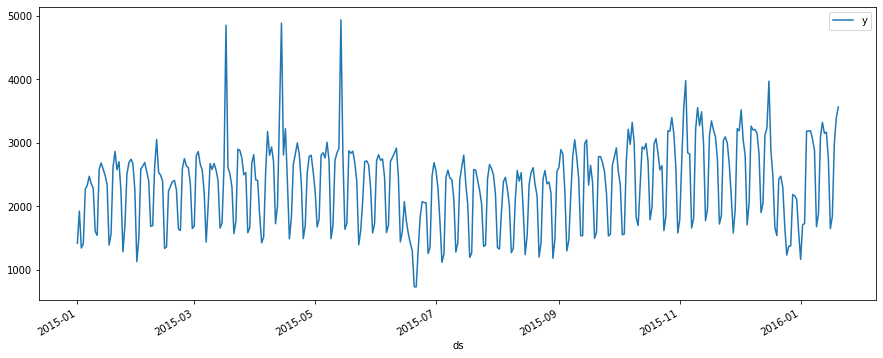

In [35]:
df.plot(x='ds',y='y',figsize=(15, 6))
plt.show()

In [87]:
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=60,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [88]:
metrics = model.fit(df, validate_each_epoch=True, freq="D") 
future = model.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 
forecast = model.predict(future)

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[60/60]: 100%|██████████| 60/60 [00:07<00:00,  8.32it/s, SmoothL1Loss=0.00643, MAE=188, RegLoss=0, MAE_val=464, SmoothL1Loss_val=0.0282]     


In [89]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2015-01-01,1414,2383.420410,969.42041,2063.125000,320.295380
1,2015-01-02,1920,2071.262695,151.262695,2068.025879,3.236630
2,2015-01-03,1338,1239.637085,-98.362915,2072.926758,-833.289856
3,2015-01-04,1404,1376.878418,-27.121582,2077.828125,-700.949646
4,2015-01-05,2264,2356.649170,92.64917,2082.729004,273.919952
...,...,...,...,...,...,...
408,2016-02-15,None,3672.870361,None,3398.950439,273.919952
409,2016-02-16,None,3939.003662,None,3405.877441,533.126282
410,2016-02-17,None,3816.466064,None,3412.804688,403.661255
411,2016-02-18,None,3740.027344,None,3419.731934,320.295380


No handles with labels found to put in legend.


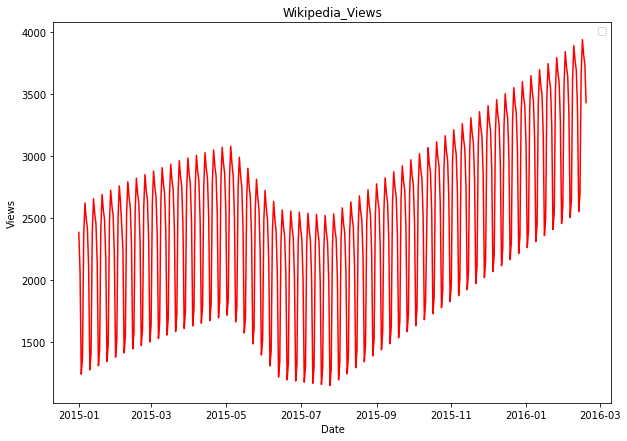

In [90]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['ds'], forecast['yhat1'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Views')
plt.title('Wikipedia_Views');

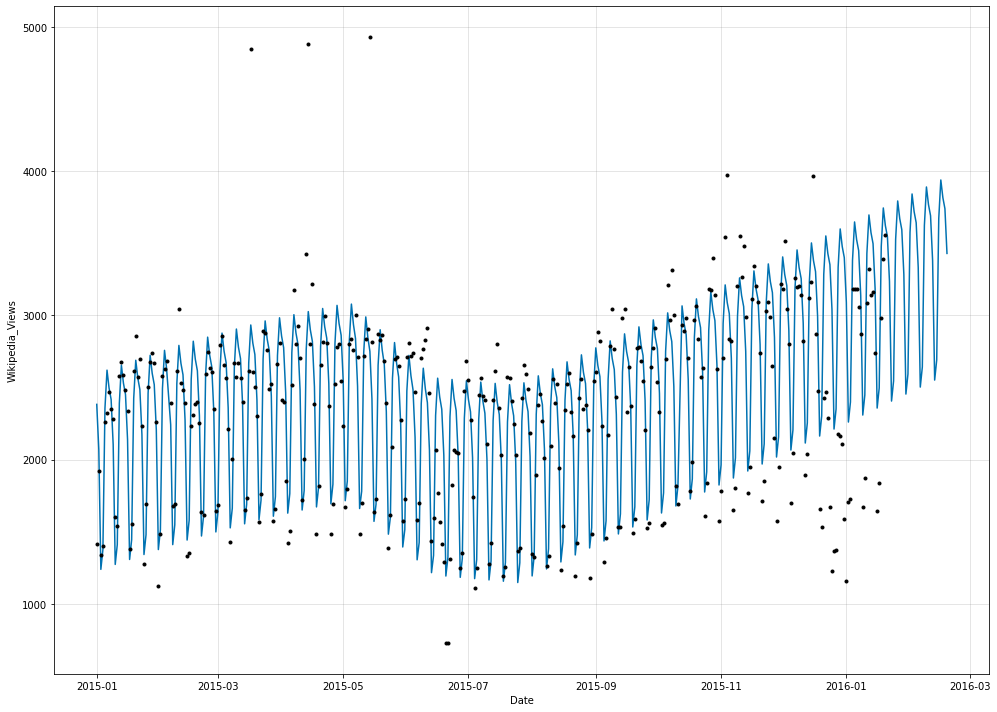

In [91]:
#plotting predictions
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Wikipedia_Views", ax=ax);

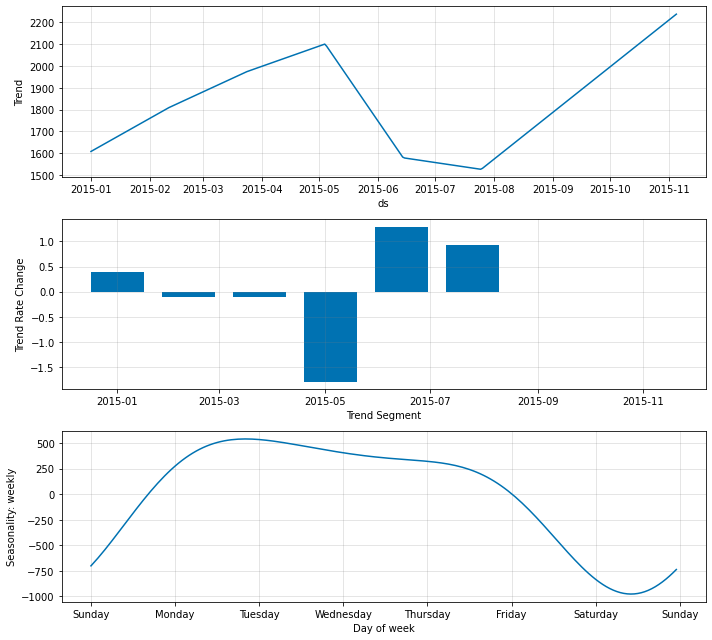

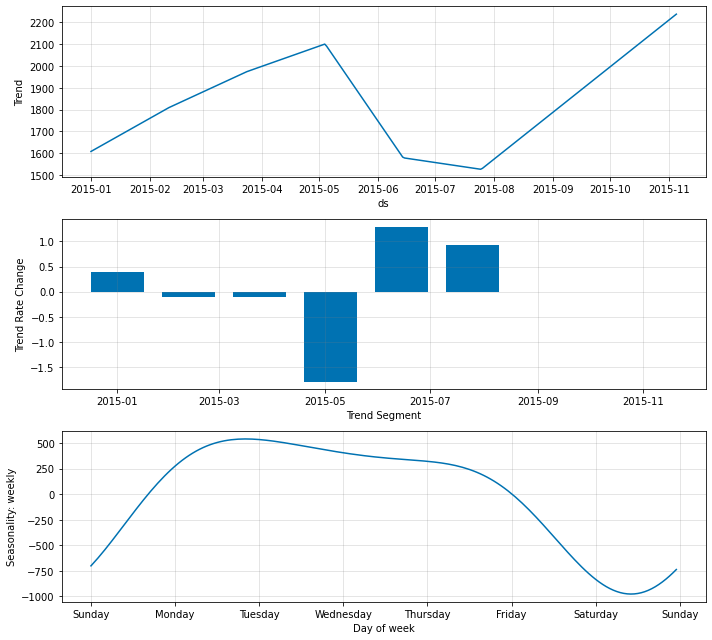

In [92]:
model.plot_parameters()

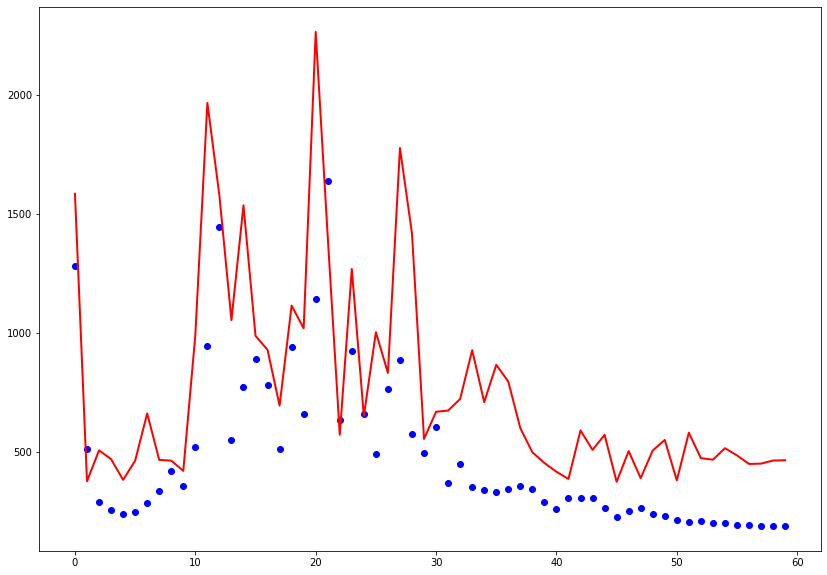

In [94]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")